In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
iris=pd.read_csv("/kaggle/input/iris/Iris.csv")

In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
species= iris['Species']
s1=species.unique()
s2=species.value_counts()
print(s2)

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Names of the Iris Species')

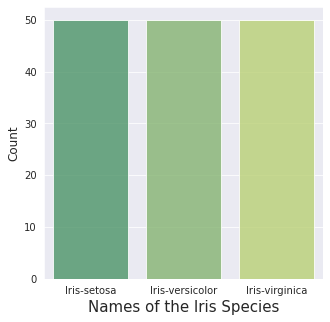

In [10]:
sns.set_style("darkgrid")
plt.figure(figsize=(5,5))
sns.barplot(s2.index, s2.values, alpha=0.8,palette='summer')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Names of the Iris Species', fontsize=15)

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

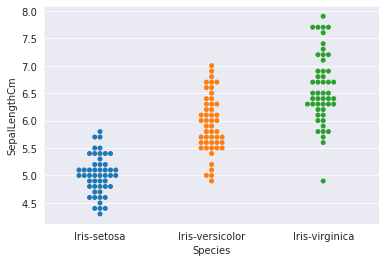

In [11]:
sns.swarmplot(x=iris['Species'],y=iris['SepalLengthCm'], data=iris)

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

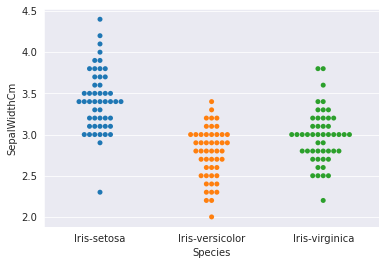

In [12]:
sns.swarmplot(x=iris['Species'],y=iris['SepalWidthCm'], data=iris)

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

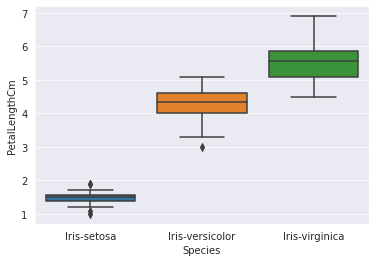

In [13]:
sns.boxplot(x='Species',y='PetalLengthCm',data=iris)

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

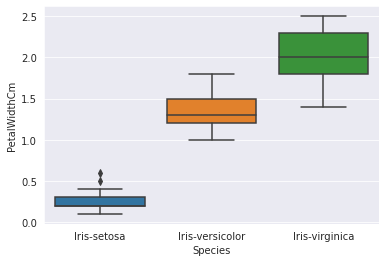

In [14]:
sns.boxplot(x='Species',y='PetalWidthCm',data=iris)

In [15]:
label_encoder = LabelEncoder() 
iris['Species']= label_encoder.fit_transform(iris['Species']) 
iris['Species'].unique() 

array([0, 1, 2])

In [16]:
iris['Species'].head(5)

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [17]:
iris['Species'].tail(5)

145    2
146    2
147    2
148    2
149    2
Name: Species, dtype: int64

In [18]:
X=iris.drop('Species', axis=1)
Y=iris['Species']
scaler = StandardScaler()
X = scaler.fit_transform(X)
iris_scaled=pd.DataFrame(X, columns=iris.columns[:-1])
iris_scaled.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-1.720542,-0.900681,1.032057,-1.341272,-1.312977
1,-1.697448,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.674353,-1.385353,0.337848,-1.398138,-1.312977
3,-1.651258,-1.506521,0.106445,-1.284407,-1.312977
4,-1.628164,-1.021849,1.263460,-1.341272,-1.312977


In [19]:
X=iris_scaled
Y=iris['Species']
X_train,X_test, Y_train,Y_test= train_test_split(X,Y, test_size=0.33, random_state=1)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(100, 5)
(50, 5)
(100,)
(50,)


In [21]:
lr=LogisticRegression()
lr.fit(X_train, Y_train)
Y_pred1 = lr.predict(X_test)
score1=accuracy_score(Y_pred1, Y_test)
lr_acc=round(score1*100,2)
print(f'Accuracy: {lr_acc}%')

Accuracy: 100.0%


In [22]:
knn = KNeighborsClassifier(n_neighbors = 12)
knn.fit(X_train, Y_train)
Y_pred2 = knn.predict(X_test)
score2=accuracy_score(Y_pred2, Y_test)
knn_acc=round(score2*100,2)
print(f'Accuracy: {knn_acc}%')

Accuracy: 98.0%


In [24]:
for i in range (1,6):
    knn1=KNeighborsClassifier(n_neighbors=i)
    knn1.fit(X_train, Y_train)
    print("For k = %d accuracy is"%i,knn1.score(X_test,Y_test))

For k = 1 accuracy is 0.98
For k = 2 accuracy is 0.98
For k = 3 accuracy is 1.0
For k = 4 accuracy is 0.98
For k = 5 accuracy is 1.0


In [26]:
knn_con=confusion_matrix(Y_test,Y_pred2)
print("Confusion Matrix for KNN",end="\n")
print(knn_con)

Confusion Matrix for KNN
[[17  0  0]
 [ 0 19  0]
 [ 0  1 13]]


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

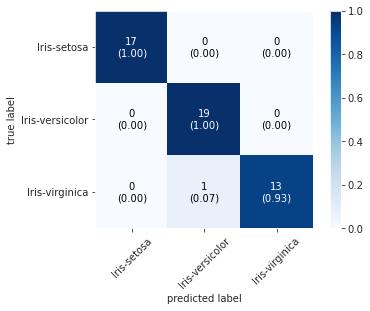

In [29]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(conf_mat=knn_con, show_absolute=True,show_normed=True,colorbar=True,class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'])

In [30]:
print(classification_report(Y_test,Y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.95      1.00      0.97        19
           2       1.00      0.93      0.96        14

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [ ]:
sv = SVC(kernel='linear').fit(X_train,Y_train)
Y_pred3 = sv.predict(X_test)
score3=accuracy_score(Y_pred3, Y_test)
sv_acc=round(score3*100,2)
print(f'Accuracy: {sv_acc}%')